In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [31]:
data = pd.read_csv('diabetes2.csv', usecols=['Glucose', 'BMI', 'Age', 'Outcome'])
data.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [32]:
data.isnull().sum()

Glucose    0
BMI        0
Age        0
Outcome    0
dtype: int64

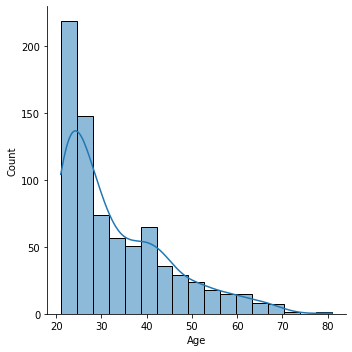

In [33]:
sns.displot(data['Age'], kde=True)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

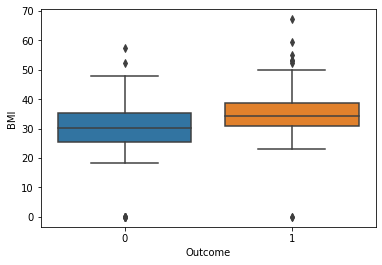

In [34]:
sns.boxplot(x="Outcome", y="BMI", data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

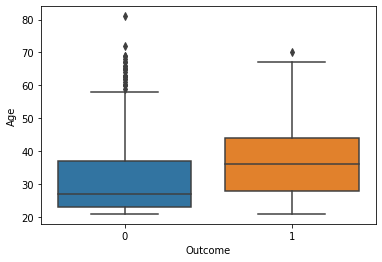

In [35]:
sns.boxplot(x="Outcome", y="Age", data=data)


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

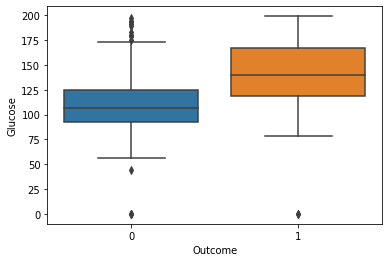

In [36]:
sns.boxplot(x="Outcome", y="Glucose", data=data)

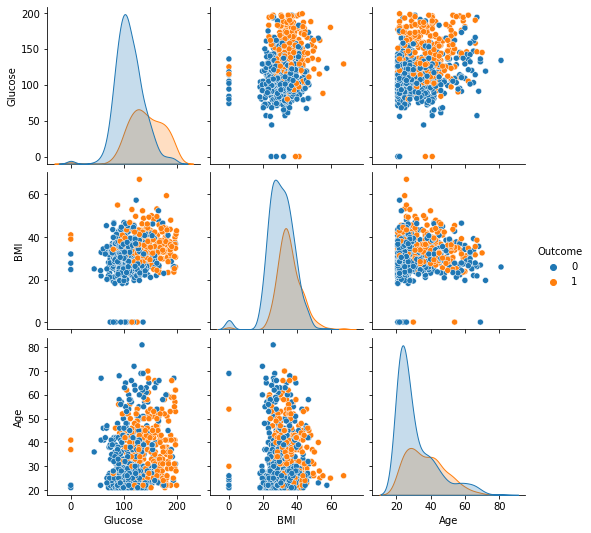

In [37]:
sns.pairplot(data, hue='Outcome')

In [39]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist() # histogram
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=plt)# prob plot
    plt.show()

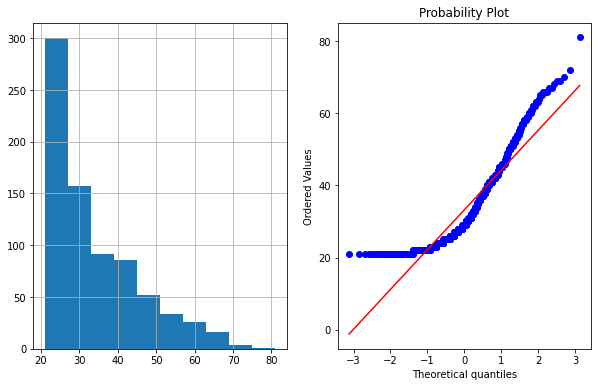

In [40]:
plot_data(data,'Age')

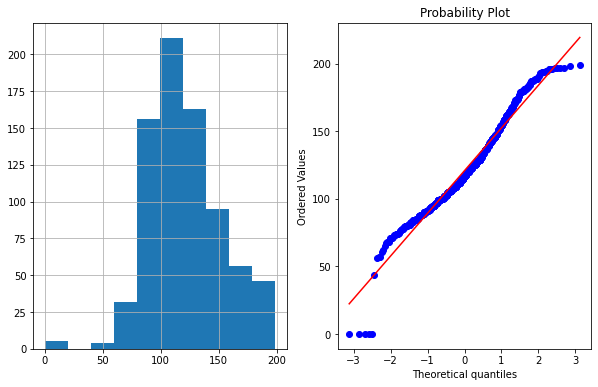

In [42]:
plot_data(data,'Glucose')

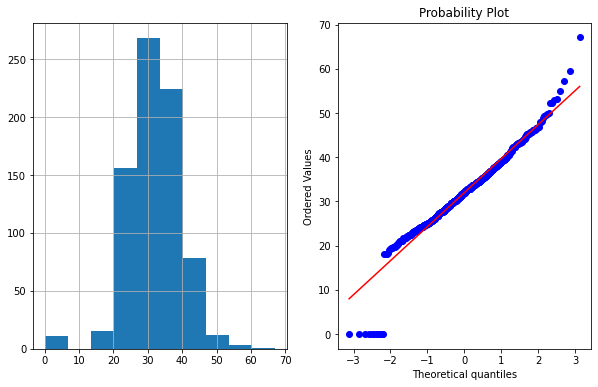

In [43]:
plot_data(data,'BMI')

[8.5741602125915, 55.36203770407516]


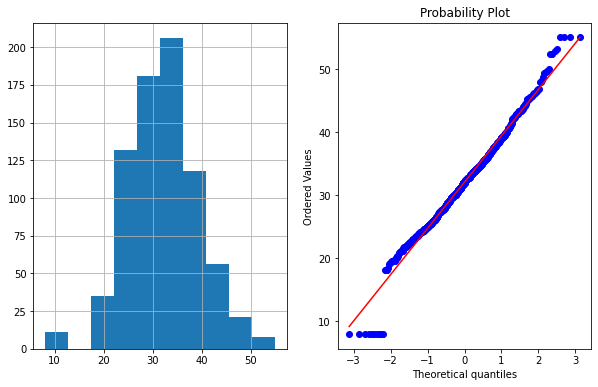

In [52]:
upper_age = data['BMI'].mean() + 3 * data['BMI'].std()
lower_age = data['BMI'].mean() - 3 * data['BMI'].std()
print([lower_age, upper_age])
data.loc[data['BMI'] >= 55, 'BMI'] = 55
plot_data(data,'BMI')

-27.0 92.0


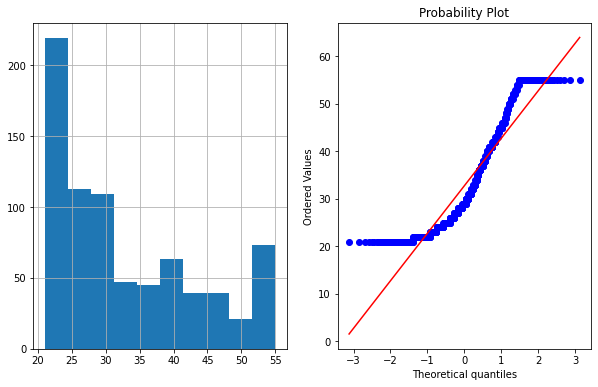

In [56]:
IQR = data["Age"].quantile(0.75) - data["Age"].quantile(0.25)
lower_fare = data['Age'].quantile(0.25) - 3 * IQR
upper_fare = data['Age'].quantile(0.75) + 3 * IQR
print(lower_fare,upper_fare)
data.loc[data['Age'] >= 92, 'Age'] = 92
plot_data(data,'Age')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

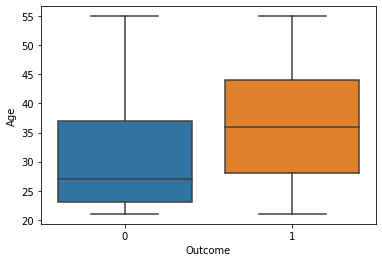

In [57]:
sns.boxplot(x="Outcome", y="Age", data=data)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def Logistic_Reg(data):
    acc_scores = []
    for i in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(
            data[['Age', 'Glucose', 'BMI']],
            data['Outcome'],test_size=0.3, 
            random_state=i)
        classifier = LogisticRegression()
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)
        acc_scores.append(accuracy_score(Y_test, Y_pred))
    return round(np.mean(acc_scores) * 100, 2)
Logistic_Reg(data)

76.88